# Polynomial Regression Model

## import libs

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import numpy as np
import pandas as pd

## read data base

In [2]:
data = pd.read_csv('CLEANED_gridsearch_1296.csv')
#print(f'{data}')
data = data.drop(data.columns[0], axis=1)
#data = data.transpose()
#print(f'{data}')

## prepare data

In [3]:
X = data.drop('density', axis=1)
#print(f'{X}')

Y = data['density']
#print(f'{Y}')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.05, random_state=29)

## create and train the model for different polynomial degrees

In [4]:
models = []
predictions = []
RMSEs = []
R2s = []
for n in range(1, 20):
    ## creation the pipeline
    model = make_pipeline(PolynomialFeatures(degree=n), LinearRegression())
    
    ## train/fit the model
    model.fit(X_train, Y_train)
    models.append(model)
    
    ## prediction using the test set
    Y_prediction = model.predict(X_test)
    predictions.append(Y_prediction)
    
    ## evaluate with Y_test
    rmse = np.sqrt(mean_squared_error(Y_test, Y_prediction))
    RMSEs.append(rmse)
    r2 = r2_score(Y_test, Y_prediction)
    R2s.append(r2)
    print(f'n =\t{n}')
    print(f'RMSE:\t{rmse}')
    print(f'R2:\t{r2}')
    print(f'')

n =	1
RMSE:	52.42522147721621
R2:	0.6496548839234035

n =	2
RMSE:	24.8920389893042
R2:	0.9210164835767444

n =	3
RMSE:	8.125065864060847
R2:	0.9915847058640869

n =	4
RMSE:	4.829944789058689
R2:	0.997026281513772

n =	5
RMSE:	3.178864050797818
R2:	0.9987118707858101

n =	6
RMSE:	3.403211726832955
R2:	0.9985236359615218

n =	7
RMSE:	3.6281977003630415
R2:	0.9983219789391298

n =	8
RMSE:	6.107794541553473
R2:	0.9952446295039006

n =	9
RMSE:	9.860716646371339
R2:	0.9876054010638335

n =	10
RMSE:	17.346258463658135
R2:	0.9616445443559942

n =	11
RMSE:	21.353173558058252
R2:	0.9418780227761544

n =	12
RMSE:	27.903553292826597
R2:	0.9007490799544805

n =	13
RMSE:	68.13214137176354
R2:	0.40827543684935574

n =	14
RMSE:	205.973007345942
R2:	-4.407993239029176

n =	15
RMSE:	143.6591578150456
R2:	-1.6307655863935162

n =	16
RMSE:	153.4080169574965
R2:	-1.999933529098818

n =	17
RMSE:	140.2773847672175
R2:	-1.5083656285528946

n =	18
RMSE:	169.93601083701736
R2:	-2.681174104589584

n =	19
RMSE:	1

## Result

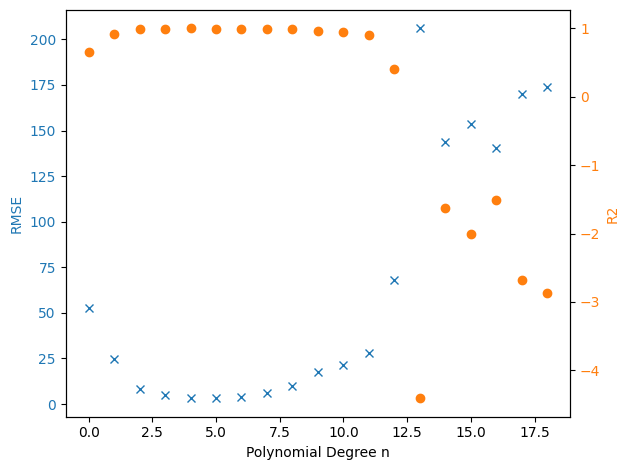

In [5]:
from matplotlib import pyplot as plt
#print(f'{RMSEs}')
#print(f'{R2s}')

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Polynomial Degree n')
ax1.set_ylabel('RMSE', color=color)
ax1.plot(RMSEs, 'x', color=color, label='RMSE')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color='tab:orange'
ax2.set_ylabel('R2', color=color)
ax2.plot(R2s, 'o', color=color, label='R2')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()


## Results

best fit between n = 3 and n = 6